## My casptone Project - Assignment 9
* Analysis of a diamond dataset
* Machine learning tool to predict the price of a diamond based on its characteristics


In [ ]:
#Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

#Reading the dataset
import pandas as pd
import numpy as np
DiamondData=pd.read_csv('/content/drive/MyDrive/Capstone_Project/diamonds.csv', encoding='latin')
print('Shape before deleting duplicate values:', DiamondData.shape)

#Removing duplicate rows if any
DiamondData=DiamondData.drop_duplicates()
print('Shape after deleting duplicate values:', DiamondData.shape)

#Printing sample data
#Start observing the Quanntitative/Categorical/Qualitative variables
DiamondData.head(10)



Shape before deleting duplicate values: (53940, 11)
Shape after deleting duplicate values: (53940, 11)


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


**Information from step 1**

There are no duplicate values

There are 53940 rows of diamond details

There are 11 columns which keep the following data:
1. Numbers the diamonds - Index
2. Carat
*  weight of the diamond (0.2--5.01)
3. Cut
*   quality of the cut (Fair, Good, Very Good, Premium, Ideal)
4. Color
*  diamond colour, from J (worst) to D (best)
5. Clarity
* a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
6. Depth
* total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
7. Table
* width of top of diamond relative to widest point (43--95)
8. Price
* price in US dollars (\$326--\$18,823)
9. x
* length in mm (0--10.74)
10. y
* width in mm (0--58.9)
11. z
* depth in mm (0--31.8)






# **Step 2/3: Problem Statement Definition and target variable identification**
* Creating a prediction model to predict the price
* The target variable is price, its predictors are: Carat, Cut, Color, Clarity, Depth, Table, length mm (x), width mm (y), depth mm (z)

# **Step 4: Visualising the distribution of target variable**

<Axes: >

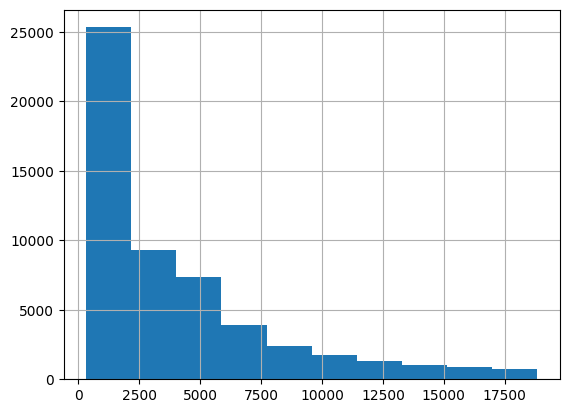

In [ ]:
import matplotlib
DiamondData['price'].hist()


**Information From Step 4**
* The data is heavily skewed towards less expensive diamonds, mostly between approximately 500 and 2000
* Even if as a percentage of the total data there are few expensive diamonds, there are still thousands of diamonds that are over 15000 meaning that there is suffiecient data for machine learning


# **Step 5: Data Exploration at a Basic Level**

In [ ]:
#Dropping the first column as it just counts the rows
DiamondData = DiamondData.drop(["Unnamed: 0"], axis=1)

In [ ]:
DiamondData.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
DiamondData.tail()

,carat,cut,color,clarity,depth,table,price,x,y,z
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [ ]:
DiamondData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [ ]:
DiamondData.describe(include='all')

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53940.000000,53940,53940,53940,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,21551,11292,13065,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.797940,NaN,NaN,NaN,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,NaN,NaN,NaN,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,NaN,NaN,NaN,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,NaN,NaN,NaN,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,NaN,NaN,NaN,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000


In [ ]:
# The dimensions of a diamond can not be 0, removing all the diamonds where x, y or z are equal to 0
DiamondData = DiamondData.drop(DiamondData[DiamondData["x"]==0].index)
DiamondData = DiamondData.drop(DiamondData[DiamondData["y"]==0].index)
DiamondData = DiamondData.drop(DiamondData[DiamondData["z"]==0].index)
DiamondData.shape
# After removing faulty data and the index column the data is now 53932 rows and 10 columns

(53920, 11)

In [ ]:
# To understand if the columns are categorical or continuous
DiamondData.nunique()

carat        273
cut            5
color          7
clarity        8
depth        184
table        127
price      11600
x            553
y            551
z            375
dtype: int64

# **Step 6: Identifying and Rejecting useless Columns**

* Carat = Continuous
*Cut = Categorical
*Color = Categorical
*Clarity = Categorical
*Depth = Continuous
*Table = Continuous
*Price = Continuous - Target Variable
*x = Continuous
*y = Continuous
*z = Continuous





#**Part 7/8: Visual Exploratory Data Analysis of data (with Histogram and Barcharts) and 8. Feature Selection based on data distribution**

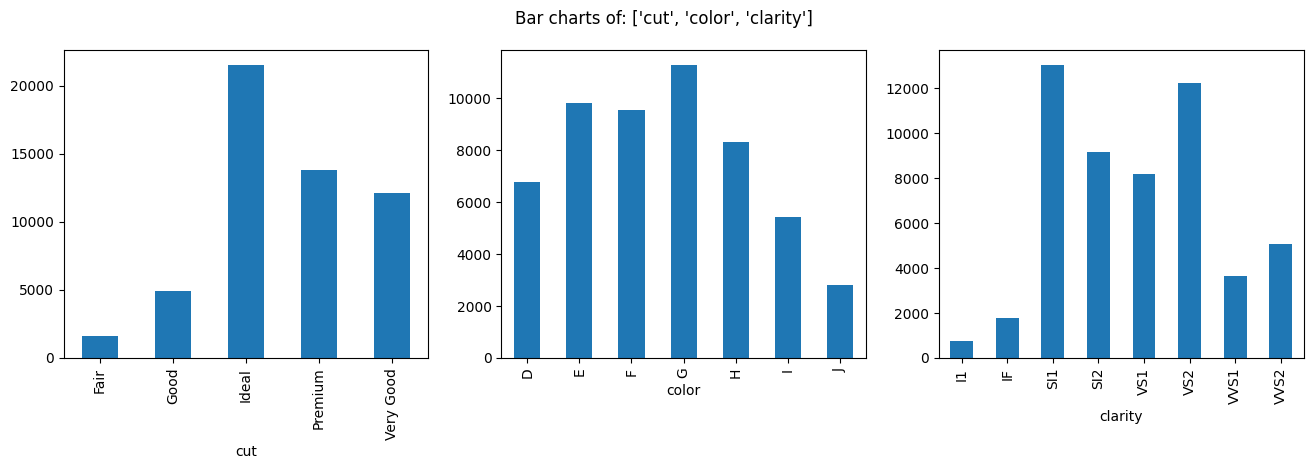

In [ ]:
# Creating bar charts to visualize the categorical data
# Creating a function that allows the creatin of multiple bar charts
def PlotBarCharts(inpData, colsToPlot):
  %matplotlib inline
  import matplotlib.pyplot as plt

  #Generating multiple subplots
  fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(16,4))
  fig.suptitle('Bar charts of: '+ str(colsToPlot))

  for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
    inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

PlotBarCharts(inpData=DiamondData, colsToPlot=['cut','color', 'clarity'])

array([[<Axes: title={'center': 'carat'}>,
        <Axes: title={'center': 'depth'}>],
       [<Axes: title={'center': 'table'}>, <Axes: title={'center': 'x'}>],
       [<Axes: title={'center': 'y'}>, <Axes: title={'center': 'z'}>]],
      dtype=object)

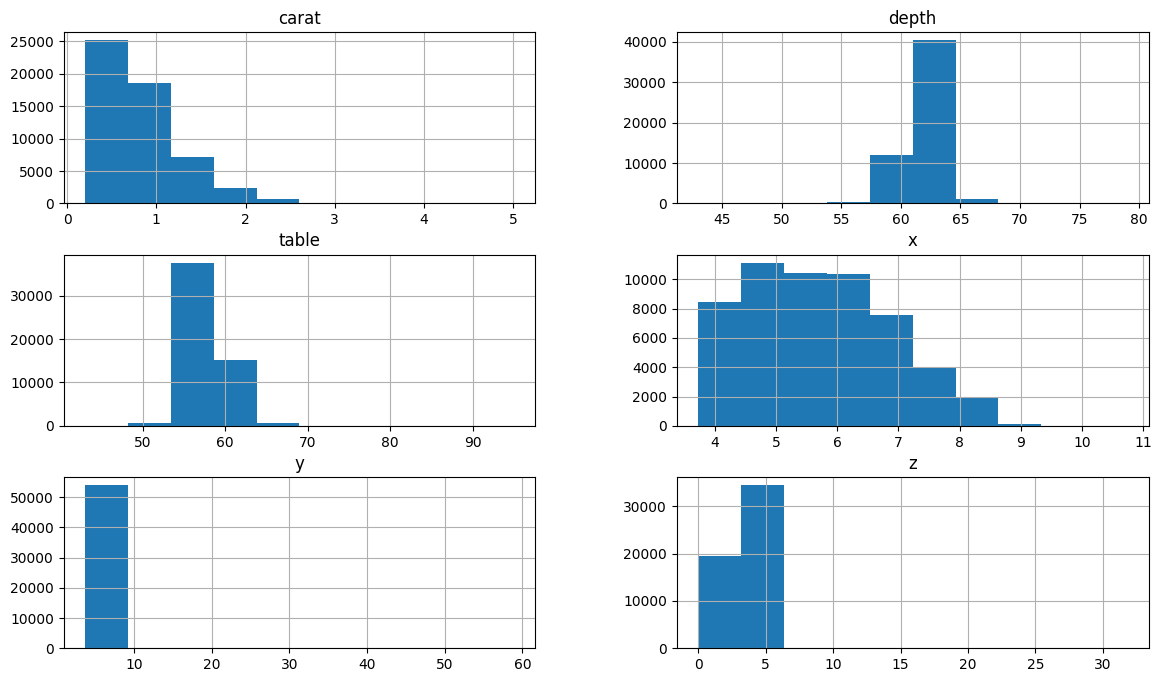

In [ ]:
DiamondData.hist(['carat', 'depth', 'table', 'x', 'y', 'z' ], figsize=(14,8))

# **Step 9: Removal of outliers and missing values**
* Data where x, y and z were equal to 0 was removed earlier in the analysis

In [ ]:
DiamondData['carat'][DiamondData['carat']<=5.01].sort_values(ascending=False)

27415    5.01
27630    4.50
27130    4.13
25999    4.01
25998    4.01
         ... 
31592    0.20
31591    0.20
31601    0.20
14       0.20
31596    0.20
Name: carat, Length: 53920, dtype: float64

There are no outliers in the 'carat' column

In [ ]:
DiamondData['table'][DiamondData['table']<=95].sort_values(ascending=False)

24932    95.0
50773    79.0
51342    76.0
51391    73.0
52861    73.0
         ... 
25179    50.0
5979     49.0
22701    49.0
35633    44.0
11368    43.0
Name: table, Length: 53920, dtype: float64

In [ ]:
DiamondData['table'][DiamondData['table']==95] = 79

In [ ]:
DiamondData['depth'][DiamondData['depth']<=79].sort_values(ascending=False)

52860    79.0
52861    79.0
41918    78.2
46679    73.6
53540    72.9
         ... 
36503    51.0
16857    50.8
6341     44.0
4518     43.0
10377    43.0
Name: depth, Length: 53920, dtype: float64

There are no outliers in the 'depth' column

In [ ]:
DiamondData['x'][DiamondData['x']<=10.74].sort_values(ascending=False)

27415    10.74
27630    10.23
25998    10.14
25999    10.02
26444    10.01
         ...  
31601     3.77
31599     3.76
31598     3.74
31596     3.73
31600     3.73
Name: x, Length: 53920, dtype: float64

There are no outliers in the 'x' column

In [ ]:
#To see ouliters that may need to be removed from y
DiamondData['y'][DiamondData['y']<=58.9].sort_values(ascending=False)  #58.9 is the maximum

24067    58.90
49189    31.80
27415    10.54
27630    10.16
25998    10.10
         ...  
31599     3.73
31601     3.72
31596     3.71
31598     3.71
31600     3.68
Name: y, Length: 53920, dtype: float64

In [ ]:
# There are 2 clear outliers in y, as they are much larger then all other values
# Replacing the outliers with the next highest non-outlier value
DiamondData['y'][DiamondData['y']>=31.80] = 10.54

array([[<Axes: title={'center': 'y'}>]], dtype=object)

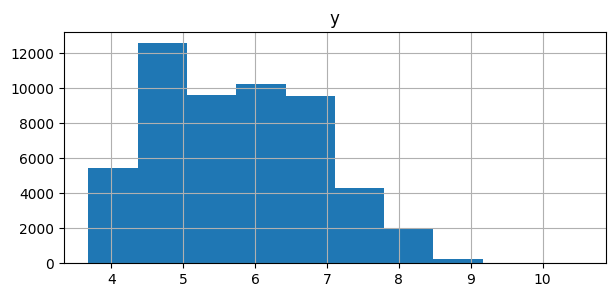

In [ ]:
# Recreating the histogram with the outliers removed
DiamondData.hist('y', figsize=(7,3))

In [ ]:
DiamondData['z'][DiamondData['z']<=31.8].sort_values(ascending=False)  # 31.8 is the maximum

48410    31.80
24067     8.06
27415     6.98
27630     6.72
27130     6.43
         ...  
31592     2.24
39246     2.06
20694     1.53
21654     1.41
14635     1.07
Name: z, Length: 53920, dtype: float64

In [ ]:
# It is clear that there is an outlier in z, it is much larger then other z values
# Replacing the outlier with the next highest non-outlier value
DiamondData['z'][DiamondData['z']==31.80] = 8.06

array([[<Axes: title={'center': 'z'}>]], dtype=object)

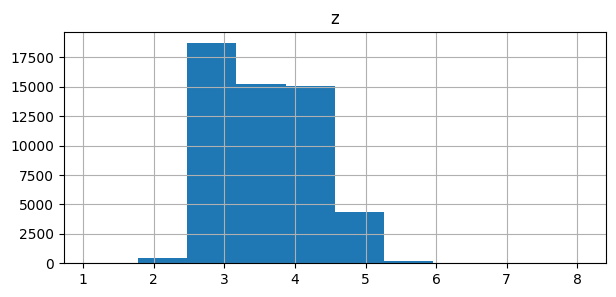

In [ ]:
DiamondData.hist('z', figsize=(7,3))

In [ ]:
# Counting the number of null values in the data
DiamondData.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

# Step 10: Visual and Statistic Correlation Analysis for Selection of Best Features


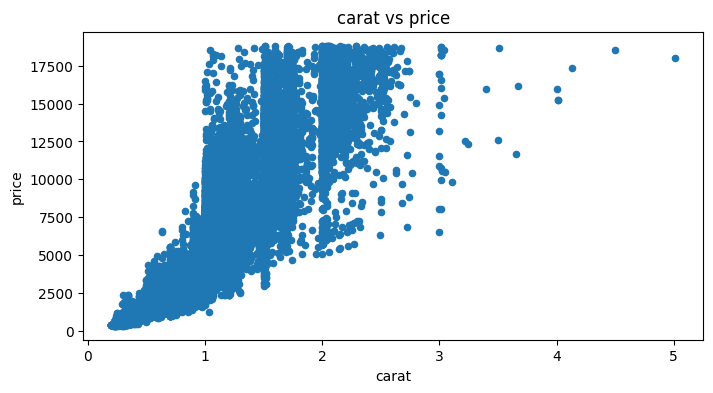

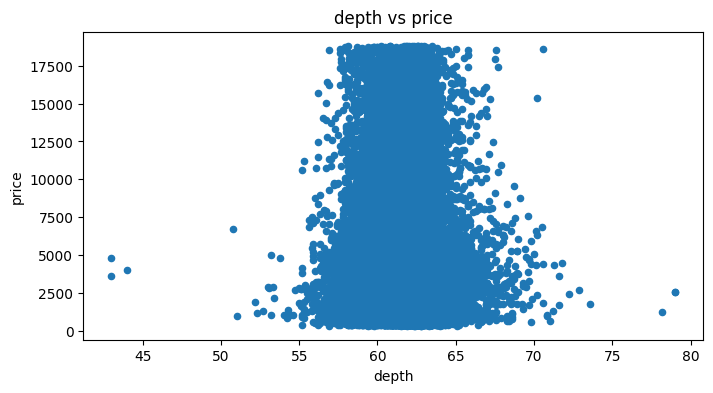

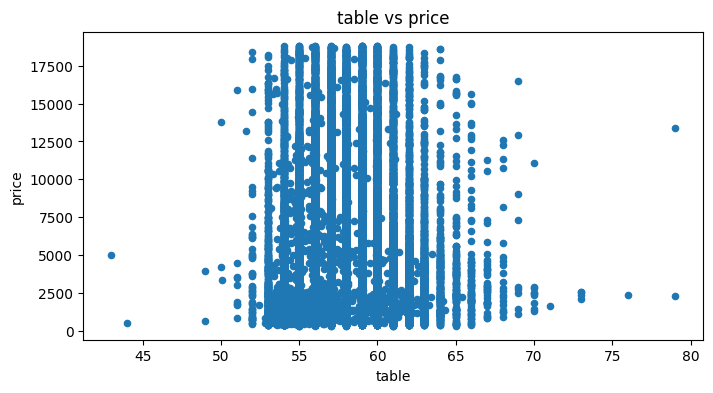

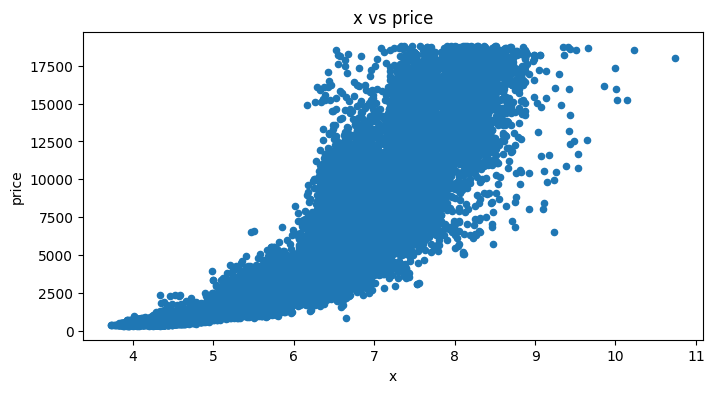

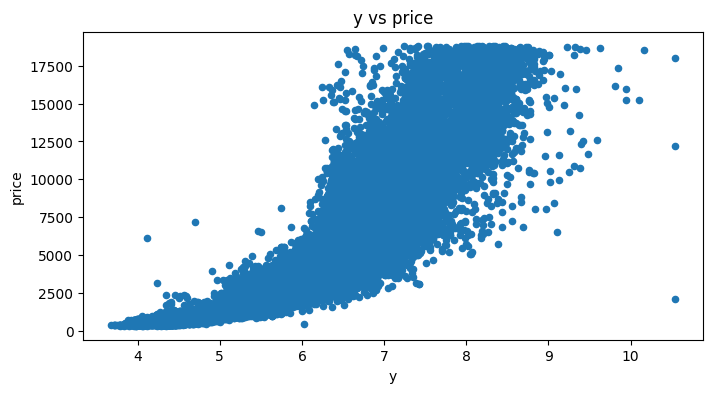

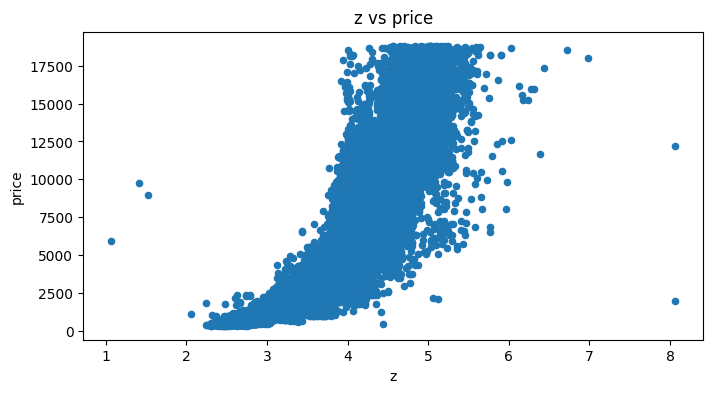

In [ ]:
ContinuousCols=['carat', 'depth', 'table', 'x', 'y', 'z']
# Plotting scatter chart for each predictor vs the price (target variable)
for predictor in ContinuousCols:
  DiamondData.plot.scatter(x=predictor, y='price', figsize=(8,4), title=predictor+" vs "+ 'price')


**Analysis of visual representation of continous relationships to the price**


* Carat vs price looks like there is a fairly strong positive relationship
* Depth vs price is very clustered and no relationship can be seen
* Table vs price has no relationship
* x vs price seems to a positive relationship and goes more directly up the higher the x value
* y vs price is very similar to x vs price, positive relationship
* z vs price is similar to x and y vs price, however it is more of a steep increase, positive relationship



In [ ]:
# Creating a table of the correlation between the continuous data columns
ContinuousCols=['price', 'carat', 'depth', 'table', 'x', 'y', 'z']  #Redefining the ContinuousCols variable to include 'price'
CorrelationData=DiamondData[ContinuousCols].corr()
CorrelationData

,price,carat,depth,table,x,y,z
price,1.000000,0.921592,-0.010729,0.127154,0.887231,0.888602,0.881499
carat,0.921592,1.000000,0.028259,0.181625,0.977779,0.976614,0.975802
depth,-0.010729,0.028259,1.000000,-0.295962,-0.025017,-0.028221,0.096421
table,0.127154,0.181625,-0.295962,1.000000,0.196135,0.189804,0.155566
x,0.887231,0.977779,-0.025017,0.196135,1.000000,0.998395,0.990366
y,0.888602,0.976614,-0.028221,0.189804,0.998395,1.000000,0.990196
z,0.881499,0.975802,0.096421,0.155566,0.990366,0.990196,1.000000


**Analysis of Correlation Data**
* The analysis of the visual data is evident in the raw data
* x, y and z have almost a 1 correlation with one another, meaning they are very similar data sets
* carat also has a strong corelation with x, y and z, just slightly less then they do with eachother - this is because the weight is directly correlated with the size of the diamond
* x, y, z and carat all have a strong relationship with price, carat's is the highest by 0.034
* table and depth have no correlation with the rest of the continuous data
**Carat will be used in the machine learning model due to its relationship with the price and for it effectively summarising the data in columns x, y and z**



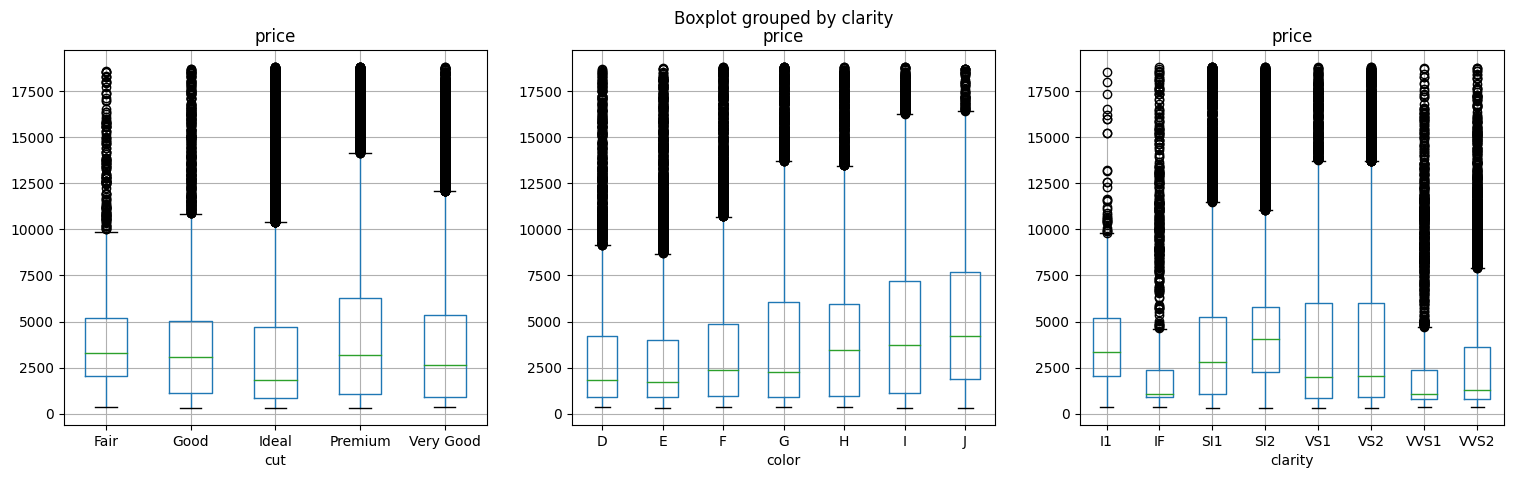

In [ ]:
CategoricalColsList=['cut', 'color', 'clarity']
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(CategoricalColsList), figsize=(18,5))
import matplotlib.pyplot as plt
for PredictorCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
  DiamondData.boxplot(column='price', by=PredictorCol, figsize=(5,5), vert=True, ax=PlotCanvas[i])



In [ ]:
def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
  from scipy.stats import f_oneway
  # Creating an empty list of final selected predictors
  SelectedPredictors=[]

  for predictor in CategoricalPredictorList:
    CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
    AnovaResults = f_oneway(*CategoryGroupLists)
    # If the P-value is less then 0.05 the predictor is correlated with the price
    if (AnovaResults[1] < 0.05):
      print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
      SelectedPredictors.append(predictor)
    else:
      print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
  return 'Selected predictors: ' + str(SelectedPredictors)
#Calling the function to check which categorical variables are correlated with target
CategoricalPredictorList=['cut', 'color', 'clarity']
FunctionAnova(inpData=DiamondData,
TargetVariable='price',
CategoricalPredictorList=CategoricalPredictorList)

cut is correlated with price | P-Value: 8.42830730759452e-150
color is correlated with price | P-Value: 0.0
clarity is correlated with price | P-Value: 1.9190895e-316


"Selected predictors: ['cut', 'color', 'clarity']"

**Final Selections for Machine Learning**

The final selected predictors of the price that will be used in the machine learning are: 'carat', 'cut, 'color' and 'clarity'.

In [ ]:
import pandas as pd
FinalSelections= ['carat', 'cut', 'color', 'clarity']
MLData = DiamondData[FinalSelections]
MLData.head()

,carat,cut,color,clarity
0,0.23,Ideal,E,SI2
1,0.21,Premium,E,SI1
2,0.23,Good,E,VS1
3,0.29,Premium,I,VS2
4,0.31,Good,J,SI2


In [ ]:
MLData.to_pickle('MLData.pkl')

# **Part 11: Data Conversion to numeric values for machine learning/predictive analysis**

In [ ]:
# Conversion to numeric values
import pandas as pd
MLDataNum=pd.get_dummies(MLData)
MLDataNum['price'] = DiamondData ['price']
MLDataNum.head()



,carat,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,...,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,price
0,0.23,False,False,True,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,326
1,0.21,False,False,False,True,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,326
2,0.23,False,True,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,327
3,0.29,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,334
4,0.31,False,True,False,False,False,False,False,False,False,...,True,False,False,False,True,False,False,False,False,335


In [ ]:
MLDataNum.columns

Index(['carat', 'cut_Fair', 'cut_Good', 'cut_Ideal', 'cut_Premium',
       'cut_Very Good', 'color_D', 'color_E', 'color_F', 'color_G', 'color_H',
       'color_I', 'color_J', 'clarity_I1', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2', 'price'],
      dtype='object')

In [ ]:
Target_Variable='price'
Predictors=['carat', 'cut_Fair', 'cut_Good', 'cut_Ideal', 'cut_Premium',
       'cut_Very Good', 'color_D', 'color_E', 'color_F', 'color_G', 'color_H',
       'color_I', 'color_J', 'clarity_I1', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2']

X=MLDataNum[Predictors].values
y=MLDataNum[Target_Variable].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [ ]:
# Standardization of data
from sklearn.preprocessing import StandardScaler, MinMaxScaler

PredictorScaler=StandardScaler()
# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)
# Generating the standardized values of X
X=PredictorScalerFit.transform(X)
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(37758, 21)
(37758,)
(16182, 21)
(16182,)


# **Part 13: Investigating Machine Learning Algorithms**

In [ ]:
#Multiple Linear Regression
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()

# Printing all the parameters of Linear regression
print(RegModel)

# Creating the model on Training Data
LREG=RegModel.fit(X_train,y_train)
prediction=LREG.predict(X_test)
from sklearn import metrics

# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, LREG.predict(X_train)))

print('\n Model Validation and Accuracy Calculations')
# Shows the values of the first few rows of data
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[Target_Variable]=y_test
TestingDataResults[('Predicted'+Target_Variable)]=np.round(prediction)
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['price']-TestingDataResults['Predictedprice']))/TestingDataResults['price'])
MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])
Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy)
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
def Accuracy_Score(orig,pred):
  MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
  #print('#'*70,'Accuracy:', 100-MAPE)
  return(100-MAPE)

from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

from sklearn.model_selection import cross_val_score
# Full data of X and Y because they are split automatically
Accuracy_Values=cross_val_score(RegModel, X , y, cv=20, scoring=custom_Scoring)
print('\nAccuracy values for 20-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

LinearRegression()
R2 Value: 0.915844994253384

 Model Validation and Accuracy Calculations
      carat  cut_Fair  cut_Good  cut_Ideal  cut_Premium  cut_Very Good  \
0 -1.177071 -0.175403 -0.316312   1.225928    -0.586085      -0.537255   
1 -0.459782 -0.175403 -0.316312  -0.815708    -0.586085       1.861315   
2 -0.839523 -0.175403 -0.316312   1.225928    -0.586085      -0.537255   
3 -0.776233 -0.175403 -0.316312  -0.815708     1.706238      -0.537255   
4  1.586602 -0.175403 -0.316312   1.225928    -0.586085      -0.537255   

    color_D   color_E   color_F   color_G  ...  clarity_I1  clarity_IF  \
0 -0.379005 -0.471103 -0.463594  1.943408  ...    -0.11802   -0.185268   
1 -0.379005 -0.471103  2.157059 -0.514560  ...    -0.11802   -0.185268   
2 -0.379005  2.122679 -0.463594 -0.514560  ...    -0.11802   -0.185268   
3 -0.379005  2.122679 -0.463594 -0.514560  ...    -0.11802   -0.185268   
4 -0.379005  2.122679 -0.463594 -0.514560  ...    -0.11802   -0.185268   

   clarity_SI1  cl

The accuracy of the Linear Regression model is only slightly above 50%, meaning that it is not a very effective model for predicting the price.

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression


X = MLDataNum[Predictors].values
y = MLDataNum[Target_Variable].values

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X, y)

# Predict the price based on the given predictors
predictors = np.array([
    0.31,  # carat
    0,    # cut_Fair
    0,    # cut_Good
    1,    # cut_Ideal
    0,    # cut_Premium
    0,    # cut_Very Good
    0,    # color_D
    0,    # color_E
    0,    # color_F
    1,    # color_G
    0,    # color_H
    0,    # color_I
    0,    # color_J
    0,    # clarity_I1
    0,    # clarity_IF
    0,    # clarity_SI1
    0,    # clarity_SI2
    1,    # clarity_VS1
    0,    # clarity_VS2
    0,    # clarity_VVS1
    0     # clarity_VVS2
]).reshape(-1, 21)

predicted_price = model.predict(predictors)[0]

print(f"Predicted price: ${predicted_price:.2f}")

Predicted price: $418.83


DecisionTreeRegressor(criterion='friedman_mse', max_depth=5)
R2 Value: 0.9127729550173614

##### Model Validation and Accuracy Calculations ##########
      carat  cut_Fair  cut_Good  cut_Ideal  cut_Premium  cut_Very Good  \
0 -1.177071 -0.175403 -0.316312   1.225928    -0.586085      -0.537255   
1 -0.459782 -0.175403 -0.316312  -0.815708    -0.586085       1.861315   
2 -0.839523 -0.175403 -0.316312   1.225928    -0.586085      -0.537255   
3 -0.776233 -0.175403 -0.316312  -0.815708     1.706238      -0.537255   
4  1.586602 -0.175403 -0.316312   1.225928    -0.586085      -0.537255   

    color_D   color_E   color_F   color_G  ...  clarity_I1  clarity_IF  \
0 -0.379005 -0.471103 -0.463594  1.943408  ...    -0.11802   -0.185268   
1 -0.379005 -0.471103  2.157059 -0.514560  ...    -0.11802   -0.185268   
2 -0.379005  2.122679 -0.463594 -0.514560  ...    -0.11802   -0.185268   
3 -0.379005  2.122679 -0.463594 -0.514560  ...    -0.11802   -0.185268   
4 -0.379005  2.122679 -0.463594 -0

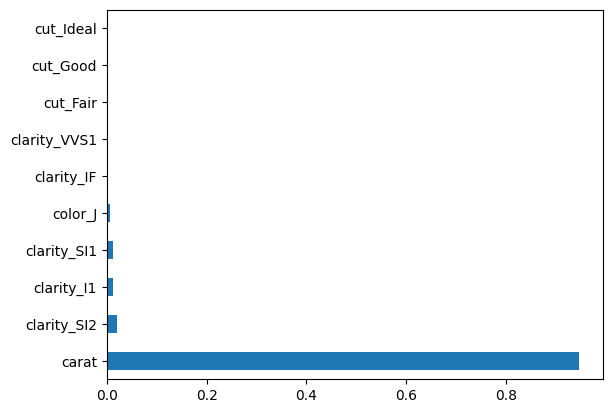

In [ ]:
# Decision Trees (Multiple if-else statements!)
from sklearn.tree import DecisionTreeRegressor
RegModel = DecisionTreeRegressor(max_depth=5,criterion='friedman_mse')
# Good Range of Max_depth = 2 to 20
# Printing all the parameters of Decision Tree
print(RegModel)
# Creating the model on Training Data
DT=RegModel.fit(X_train,y_train)
prediction=DT.predict(X_test)
from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, DT.predict(X_train)))
# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DT.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

print('\n##### Model Validation and Accuracy Calculations ##########')
# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[Target_Variable]=y_test
TestingDataResults[('Predicted'+Target_Variable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
TestingDataResults['price']-TestingDataResults['Predictedprice']))/TestingDataResults['price'])
MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])
Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
  MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
  return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

This model could be useful as it has over 70% accuracy. It appears to heavily rely on the data from the carat column meaning it may not be fully taking into account all of the details.

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)
R2 Value: 0.9745924293805549

##### Model Validation and Accuracy Calculations ##########
      carat  cut_Fair  cut_Good  cut_Ideal  cut_Premium  cut_Very Good  \
0 -1.177071 -0.175403 -0.316312   1.225928    -0.586085      -0.537255   
1 -0.45978

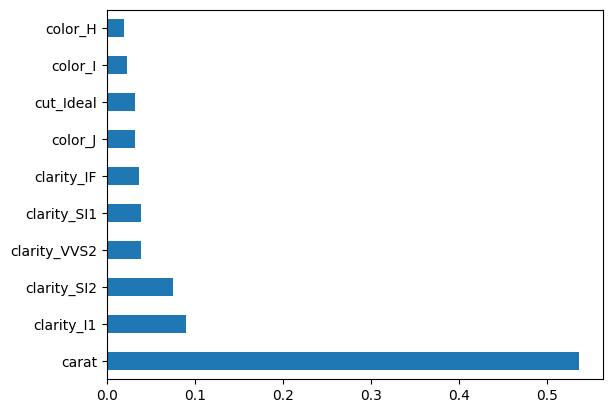

In [ ]:
# Xtreme Gradient Boosting (XGBoost)
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=2,
learning_rate=0.1,
n_estimators=1000,
objective='reg:linear',
booster='gbtree')
# Printing all the parameters of XGBoost
print(RegModel)
# Creating the model on Training Data
XGB=RegModel.fit(X_train,y_train)
prediction=XGB.predict(X_test)
from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, XGB.predict(X_train)))
# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

print('\n##### Model Validation and Accuracy Calculations ##########')
# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[Target_Variable]=y_test
TestingDataResults[('Predicted'+Target_Variable)]=np.round(prediction)
# Printing sample prediction values
print(TestingDataResults.head())
# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['price']-TestingDataResults['Predictedprice']))/TestingDataResults['price'])
MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])
Accuracy =100 - MAPE

MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

def Accuracy_Score(orig,pred):  #This function is used to calculate the accuracy
  MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
  #print('#'*70,'Accuracy:', 100-MAPE)
  return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score
# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))



#**Part 14: Selection of the best model**
The XGBRegressor model is the most accurate, with an average accuracy of 85.99%. The median and mean of this model are close together meaning that it consistently has accurate predictions.


XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)
R2 Value: 0.9740855617178689

##### Model Validation and Accuracy Calculations ##########
  carat cut_Fair cut_Good cut_Ideal cut_Premium cut_Very Good color_D color_E  \
0  0.23    False    False      True       False         False   False    True

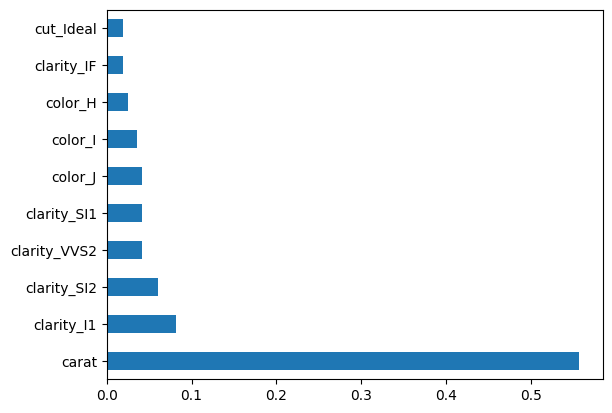

In [ ]:
# Xtreme Gradient Boosting (XGBoost)
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=2,
learning_rate=0.1,
n_estimators=1000,
objective='reg:linear',
booster='gbtree')
# Printing all the parameters of XGBoost
print(RegModel)
# Creating the model on Training Data
XGB=RegModel.fit(X,y)
prediction=XGB.predict(X)
from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y, XGB.predict(X)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

print('\n##### Model Validation and Accuracy Calculations ##########')
# Printing some sample values of prediction
DataResults=pd.DataFrame(data=X, columns=Predictors)
DataResults[Target_Variable]=y
DataResults[('Predicted'+Target_Variable)]=np.round(prediction)

# Printing sample prediction values
print(DataResults.head())

# Calculating the error for each row
DataResults['APE']=100 * ((abs(
  DataResults['price']-DataResults['Predictedprice']))/DataResults['price'])
MAPE=np.mean(DataResults['APE'])
MedianMAPE=np.median(DataResults['APE'])
Accuracy =100 - MAPE

MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

def Accuracy_Score(orig,pred):  #This function is used to calculate the accuracy
  MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
  #print('#'*70,'Accuracy:', 100-MAPE)
  return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score
# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


  carat cut_Fair cut_Good cut_Ideal cut_Premium cut_Very Good color_D color_E  \
0  0.23    False    False      True       False         False   False    True   
1  0.21    False    False     False        True         False   False    True   
2  0.23    False     True     False       False         False   False    True   
3  0.29    False    False     False        True         False   False   False   
4  0.31    False     True     False       False         False   False   False   

  color_F color_G  ... clarity_I1 clarity_IF clarity_SI1 clarity_SI2  \
0   False   False  ...      False      False       False        True   
1   False   False  ...      False      False        True       False   
2   False   False  ...      False      False       False       False   
3   False   False  ...      False      False       False       False   
4   False   False  ...      False      False       False        True   

  clarity_VS1 clarity_VS2 clarity_VVS1 clarity_VVS2 price Predictedprice  
0    

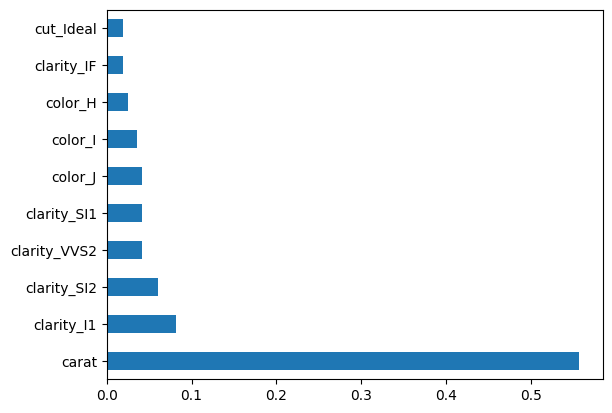

In [ ]:
import numpy as np
from xgboost import XGBRegressor


X = MLDataNum[Predictors].values
y = MLDataNum[Target_Variable].values

# Create a linear regression model
model = XGBRegressor(max_depth=2,
learning_rate=0.1,
n_estimators=1000,
objective='reg:linear',
booster='gbtree')

%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

DataResults=pd.DataFrame(data=X, columns=Predictors)
DataResults[Target_Variable]=y
DataResults[('Predicted'+Target_Variable)]=np.round(prediction)
print(DataResults.head())

# Train the model
model.fit(X, y)

# Predict the price based on the given predictors
predictors = np.array([
    0.23,  # carat
    0,    # cut_Fair
    0,    # cut_Good
    1,    # cut_Ideal
    0,    # cut_Premium
    0,    # cut_Very Good
    0,    # color_D
    1,    # color_E
    0,    # color_F
    0,    # color_G
    0,    # color_H
    0,    # color_I
    0,    # color_J
    0,    # clarity_I1
    0,    # clarity_IF
    0,    # clarity_SI1
    1,    # clarity_SI2
    0,    # clarity_VS1
    0,    # clarity_VS2
    0,    # clarity_VVS1
    0     # clarity_VVS2
]).reshape(-1, 21)

predicted_price = model.predict(predictors)[0]

print(f"Predicted price: ${predicted_price:.2f}")